# Wednesday, Feb. 15, 2:05 PM

## Experiment #2 - Week 1 - Familiarization Notes

## Working with Tom Lubomirski(tomlubomirski@gmail.com)

# Objective

* Based on the apparatus available, the primary objective we plan to work towards is  testing the rate of cooling of the three aluminum rods which are to be immersed in hot water.

* There are three primary modes of heat transfer are conduction, convection and radiation.

* The temperature is a quantity that measures the relative hotness or coldness of an object, typically with respect to the environment. This is the most important quantity for this experiment. It is measured in standard units of Kelvin (K) using a thermometer (which is configured to Celsius but we will convert it accordingly $ K = 273 \pm C$.

* We will use a pot of water which is heated on a induction stove (induction is a process of heating electrically conductive materials via electromagentic induction which apparently excites electrons in the surfaces in contact by creating an EM field ).

* The three aluminium rods are of differing finishes; one is polished with a smooth surface, one is lacquered (coating to preserve a material, often made from resin) and the last one is a rough surface. 

* Presumably, they have different rates of cooling. Hence, our hypothesis is that the pipe with the largest surface area would cool/heat the fastest (probably the rough rod).

### Research Question :
* What is the cooling effect observed for different finishes of aluminum when subject to an equal temperature of 381 $\pm$ 0.1 K ? 

# Tools

* Three aluminium rods, one lacquered, one polished and one rough.

* Wooden holders - to place the aluminium rods and hold them vertically.

* Thermometers - to measure temperatures (It is to be noted that we plan on using a digital thermometer hooked up to an Arduino which will be programmed to take data but for the time being, we will be using glass thermometers

* Induction stove - to heat water.

* Pot - to hold water and heat it along with rods.

* Vernier calipers - to measure the radius/diameter of rods.

* Phone timer.

Measurement range : 

* Radius/Diamater - $10^{-3} \pm 10^{-4} m$.

* Temperature - $1 \pm 0.1 K$.

* Time - seconds.

# Quantities and Relations

* Pretty much taken from the familiarization notes, the following are heat transfer modes: 

$\textbf{Conduction} ; \frac{dQ}{dt} = -kA\frac{dT}{dx}$

Heat transfer through direct contact.


$\textbf{Convection} ; \frac{dQ}{dt} = -Ae\sigma T_{0}^{4}$

Heat due to the bulk movement of particles in an environment.


$\textbf{Radiation} ; \frac{dQ}{dt} = -hA(T-T_{0})$

$h = 1.32\frac{J}{m^{7/4}K^{5/4}} (\frac{T-T_{0}}{D})^{1/4}$

Heat due to electromagnetic waves.


* $T_{0}$ is the temperature of the environment, T is the temperature, J $\rightarrow$ Joules, K $\rightarrow$ Kelvin, m $\rightarrow$ Metres (just dimensionally correct, not quantities in the actual formula).

* Emissivity which is the quantity that will be solved for presumably is the ability of an object to emit energy.

* Sources of error -> when using the glass thermometer, it would be more of an estimation by just looking at it.


# Test and Try

* Lengths of rods = 0.36 $\pm$ 0.01 m

* Diameter of the polished rod = 0.023 $\pm$ 0.0005 m.

* Diameter of the lacquered rod = 0.021 $\pm$ 0.0005 m.

* Diamater of the rough rod = 0.022 $\pm$ 0.0005 m.

* Room temperature = 295.2 $\pm$ 0.1 K.

In [7]:
import data_entry
import matplotlib.pyplot as plt
import numpy as np

t_test1 = data_entry.sheet('test_temp1.csv')
t_test2 = data_entry.sheet('test_temp2.csv')
t_test3 = data_entry.sheet('test_temp3.csv')

Sheet name: test_temp1.csv


Sheet name: test_temp2.csv


Sheet name: test_temp3.csv


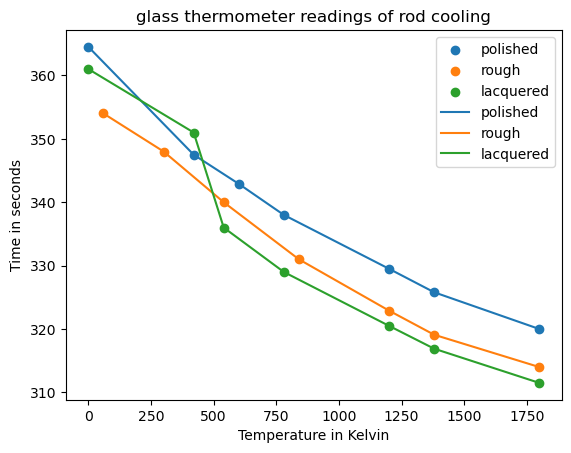

In [8]:
plt.scatter(tpolVec*60, TpolVec + 273, label = 'polished')
plt.scatter(troughVec*60, TroughVec + 273, label = 'rough')
plt.scatter(tlacVec*60, TlacVec + 273, label = 'lacquered')
plt.plot(tpolVec*60, TpolVec + 273, label = 'polished')
plt.plot(troughVec*60, TroughVec + 273, label = 'rough')
plt.plot(tlacVec*60, TlacVec + 273, label = 'lacquered')
plt.title('glass thermometer readings of rod cooling')
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Time in seconds')
plt.legend()

# Wednesday, Mar. 1, 2:08 PM

## Experiment #2 - Week 2 - Using a digital thermometer

## Working with Tom Lubomirski(tomlubomirski@gmail.com)

## Progress and Planning

Having tested and collected data using a thermometer available in the lab, we realized that the process of reading the themrometer accurately, and at appropriate time intervals for each of the three rods is not just difficult but also a major source of uncertainty.

In order to minimize this, we decided to setup and use a DS18B20 Digital Thermometer with an Arduino. It collects data simultaneously from all three rods (using three waterproof digital thermometers).

The apparatus now used contains the following :

* Arduino UNO
* Three 4.7 KΩ resistors
* Three DS18B20 Digital Thermometers
* A breadboard and cables.

# Procedure (revised) :

__The arduino is programmed in its own interface to simultaneously collect temperature and record time for three sensors - all of which are individually connected to the arduino via a breadboard and cables. The digital thermometers are first placed in the hot water bath in order to configure which sensor will be used for which rod. This was done by first placing one sensor in and the output array would contain 3 values. Whichever value of temperature in the array went up when placed inside first would be associated wuth that sensor. After calibration, the rods are placed in the hot water. After heating up to a common temperature, they are placed on the table within the holders to keep them upright. The sensors are then placed inside the rods at the same time and the data collection begins.__

## Today's Objective

* Collect refined sets of data and ascertain how we can fit it to the different modes of heat transfer.

* Additionally, we hope to get a more clear understanding of the model we will ultimately be fitting of the combined convective and radiative processes

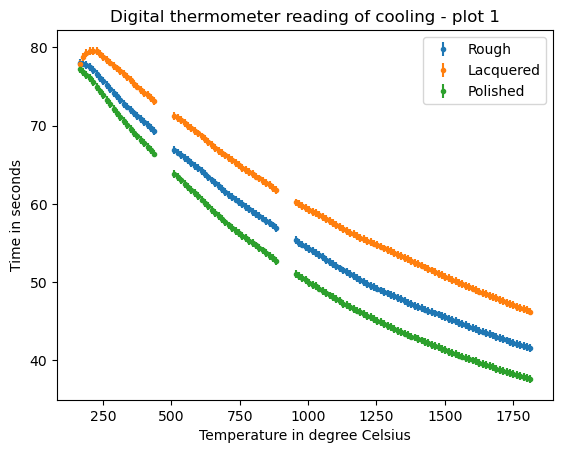

In [9]:
import numpy as np
data = np.genfromtxt('temp20230301-145337.csv', delimiter=',')
t = data[13:,0]
T1 = data[13:,1]
T2 = data[13:,2]
T3 = data[13:,3]
err = data[13:,4]
import matplotlib.pyplot as plt
plt.clf()
plt.errorbar(t,T1,yerr=err,fmt='.',label = 'Rough')
plt.errorbar(t,T2,yerr=err,fmt='.', label = 'Lacquered')
plt.errorbar(t,T3,yerr=err,fmt='.', label = 'Polished')
plt.title('Digital thermometer reading of cooling - plot 1')
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Time in seconds')
plt.legend()

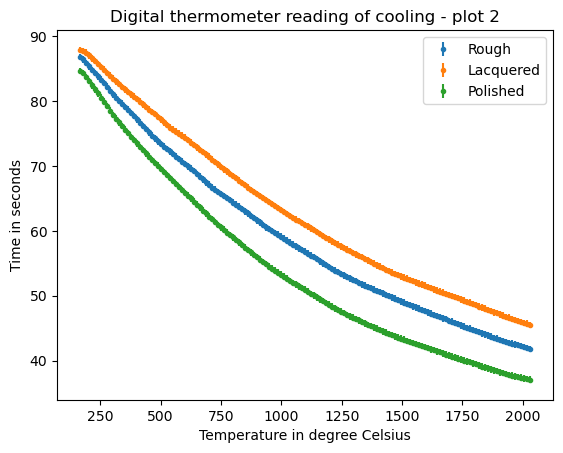

In [10]:
import numpy as np
data = np.genfromtxt('temp20230301-153525.csv', delimiter=',')
t = data[13:,0]
T1 = data[13:,1]
T2 = data[13:,2]
T3 = data[13:,3]
err = data[13:,4]
import matplotlib.pyplot as plt
plt.clf()
plt.errorbar(t,T1,yerr=err,fmt='.',label = 'Rough')
plt.errorbar(t,T2,yerr=err,fmt='.', label = 'Lacquered')
plt.errorbar(t,T3,yerr=err,fmt='.', label = 'Polished')
plt.title('Digital thermometer reading of cooling - plot 2')
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Time in seconds')
plt.legend()

## Reflection on data collection.

* Evidently, the latter two data sets we collected and plotted are better in terms of quality and probably accuracy too since it's all automated now.

* It is to be noted that the first of the two plots from today has some gaps in the data which occurred due to the computer falling asleep and it stopped taking data.

* The initial points in the two data sets were also disregarded since it contains the very tail end of the heating before the cooling begins.

* Additionally, we realized we might have flipped the lacquered and polished models in the first week.


# Wednesday, Mar. 8, 2:13 PM

## Experiment #2 - Week 3 - Progress and discussions on potential uncertainties

## Working with Tom Lubomirski(tomlubomirski@gmail.com)

## Notes of progress so far :

* Having qualitatively proven that our digital and automated data collection method is better than the glass thermometers, we decided to take two good sets of data however one of it during the setup and collection phase had some errors come up.

* As a result, we plan on taking two more data sets first, then assess sources of uncertainities and potentially discuss how we can implement the differential equation for conective and radiative heat transfer.

## Revised Methodology :

* We place the three metal rods in the water bath and wait till it reaches maximum temperature.

* The arduino script runs.

* The digital thermometers are placed one after the other into the bath to calibrate which one reads which temperature. This is done to facilitate the identification.

* The thermometers are then placed in the rods and as the script runs, temperatures are collected.

* The data is stored in a csv file and then it's plotted.

* The thermometer has a constant instrumental uncertainty which is the only __quantifiable__ source of uncertainty in our data, set at 0.5 Kelvin.

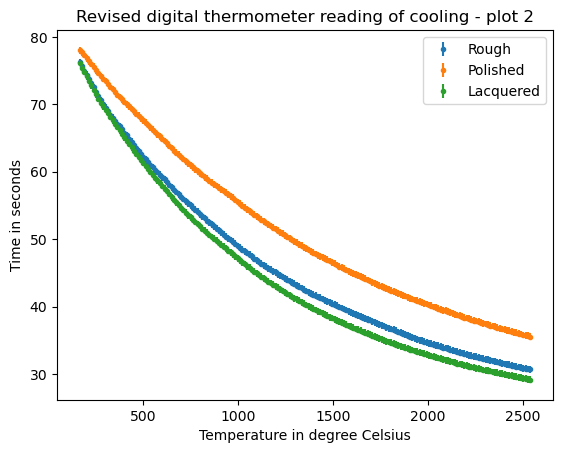

In [11]:
import numpy as np
data = np.genfromtxt('temp20230308-154114.csv', delimiter=',')
t = data[13:,0]
T1 = data[13:,1]
T2 = data[13:,2]
T3 = data[13:,3]
err = data[13:,4]
import matplotlib.pyplot as plt
plt.clf()
plt.errorbar(t,T1,yerr=err,fmt='.',label = 'Rough')
plt.errorbar(t,T2,yerr=err,fmt='.', label = 'Polished')
plt.errorbar(t,T3,yerr=err,fmt='.', label = 'Lacquered')
plt.title('Revised digital thermometer reading of cooling - plot 2')
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Time in seconds')
plt.legend()

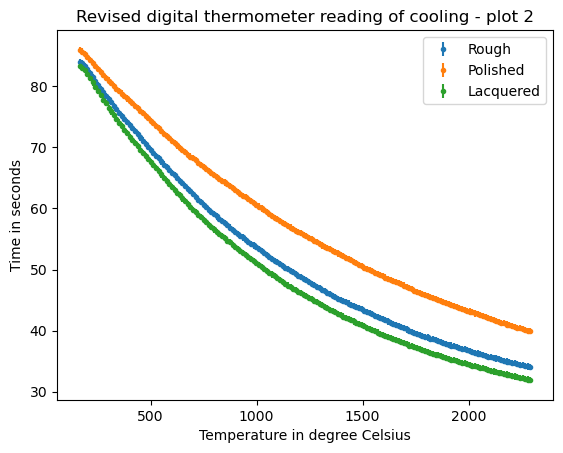

In [12]:
import numpy as np
data = np.genfromtxt('temp20230308-144704.csv', delimiter=',')
t = data[13:,0]
T1 = data[13:,1]
T2 = data[13:,2]
T3 = data[13:,3]
err = data[13:,4]
import matplotlib.pyplot as plt
plt.clf()
plt.errorbar(t,T1,yerr=err,fmt='.',label = 'Rough')
plt.errorbar(t,T2,yerr=err,fmt='.', label = 'Polished')
plt.errorbar(t,T3,yerr=err,fmt='.', label = 'Lacquered')
plt.title('Revised digital thermometer reading of cooling - plot 2')
plt.xlabel('Temperature in degree Celsius')
plt.ylabel('Time in seconds')
plt.legend()

* As mentioned earlier, there were some errors that showed up and during our calibration in the previous week for our plots, the polished and lacquered plots got swapped as compared to our first week data take.

* In order to rectify that, we decided to retake and recalibrate everything. 

* We ran the code to obtain data twice after making some revisions to the arduino code and setting up the rods to definitively obtain the above two plots.

# Wednesday, Mar. 15, 2:04 PM

## Experiment #2 - Week 4 - Solving for emissivity and obtaining an equation

## Working with Tom Lubomirski(tomlubomirski@gmail.com)

## Plan for today

* Having obtained a few good data sets, we decided to obtain a definitive equation and plug it into a python code using the solve_ivp method to obtain emissivity.

* Combining the convective and radiative methods of cooling, I obtained the following equation :

$ \frac{dQ}{dt} = -T_{o}A(σeT_{o}^{4} + h) - hAT$

where $ h = 1.32 (\frac{T-T_{o}}{D})^{1/4}$

/tmp/ipykernel_56/3211769639.py:21: RuntimeWarning: invalid value encountered in power
  dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)


0.734150652663291

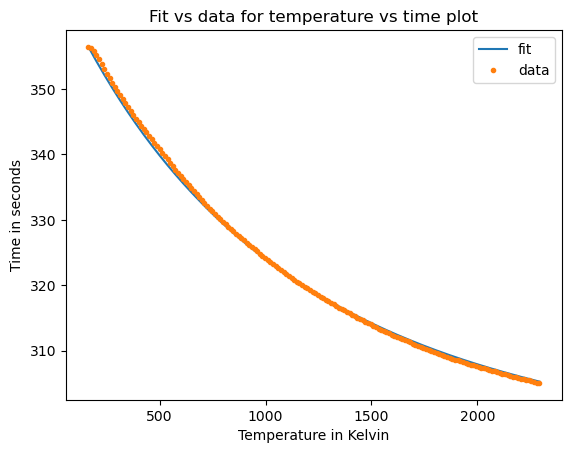

In [13]:
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

r = 0.0135  # Radius (m)
D = r*2
h = 0.304  # Length (m)
A = np.pi * r**2 + np.pi * 2 * r * h  # Area (m^2)
V = np.pi * r**2 * h  # Volume (m^3)
rho = 2710  # Density (kg/m^3)
m = rho * V  # Mass (kg)
C = 887  # Specific heat capacity
Tr = 20 + 273.15  # Room temperature (K)
sig = 5.67 * 10**-8  # Stefan-Boltzmann constant

# Differential equation

def cool(t, T, e):
    
    dQdt_rad = A * e * sig * (Tr**4 - T**4)
    
    dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)
    
    return np.array([(dQdt_rad + dQdt_con) / (m * C)])
    #return dQdt_rad

def solve_cool(t, e):

    # Initial conditions
    T0 = T0_r

    # Time interval to integrate over
    t0 = np.min(t) # initial time 
    tf = np.max(t) # final time
    t_pt = [t0, tf]
    t_arr = t
    
    # Define other inputs to function other that x and y values
    
    args = [e]

    sol = solve_ivp(fun=cool, t_span=t_pt, y0=T0, t_eval=t_arr, args=args)

    t_sol = sol['t']
    T_sol = sol['y'][0]

    return T_sol


data = np.genfromtxt('temp20230308-144704.csv', delimiter=',')
t_data = data[13:,0]
T1_data = data[13:,1] + 273.15
T2_data = data[13:,2] + 273.15
T3_data  = data[13:,3] + 273.15
err = data[13:,4]

# Inital temperature
T0_r = [T3_data[0]]

# Uncertainty in the y-values

yerr = err

# Curve fitting

params, pcov = curve_fit(solve_cool, t_data, T3_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))

e_r = params[0]
de_r = pcov[0,0]

T_sol_r = solve_cool(t_data, e_r)

# Residuals

#Res_r = T3_data - T_sol_r
plt.plot(t_data,T_sol_r, label = 'fit')
plt.plot(t_data,T3_data, '.', label = 'data')
plt.xlabel('Temperature in Kelvin')
plt.ylabel('Time in seconds')
plt.title('Fit vs data for temperature vs time plot')
plt.legend()
e_r


## Progress

Having used a differential equation solving python program to obtain emissivity, we plotted the data we collected to the curve fit obtained from solving the differential equations.

The following emissivities are obtained from the data set 'temp20230308-144704.csv'.

* Rough rod's emissivity = 0.5328037788064725

* Polished rod's emissivity = 0.10079785747955479

* Lacquered rod's emissivity = 0.734150652663291

We spent most of today troubleshooting the differential equation solver.

The residuals, uncertainties and analysis tools will be worked on next lab.

The plot obtaind here is just to test if our emissivity values are reasonable (below 1) and to compare them to each other by repeatedly running the simulation.

__The analysis tool used is an exponential decay curve based off of the differential equation produced by combining the convective and radiative heat transfer methods. We used the solve_ivp function from scipy in order to predict the characteristics of the model given an initial point and the different parameters in order to solve for the emissivity.__

# Wednesday, Mar. 22, 2:12 PM

## Experiment #2 - Week 5 - Analysis and completion

## Working with Tom Lubomirski(tomlubomirski@gmail.com)

## Progress and Planning

A few things we need to note : 

__Uncertainties are still set at exactly 0.5 Kelvin as seen in the instruction manual of the thermal sensors.__ The curve fit function is plot along with the individual data points. 
The data points are set at the smallest size in order to be able to see both the curve fit line and the data.

The following are the emissivities from the data set 'temp20230308-154114.csv' : 

* Rough rod's emissivity = 0.5475720935094912

* Polished rod's emissivity = 0.10090410671745208

* Lacquered rod's emissivity = 0.7368225369651725



/tmp/ipykernel_56/2354886705.py:21: RuntimeWarning: invalid value encountered in power
  dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)


(0.45614799821525204, 0.023259402688826907, 0.6392437581165249)

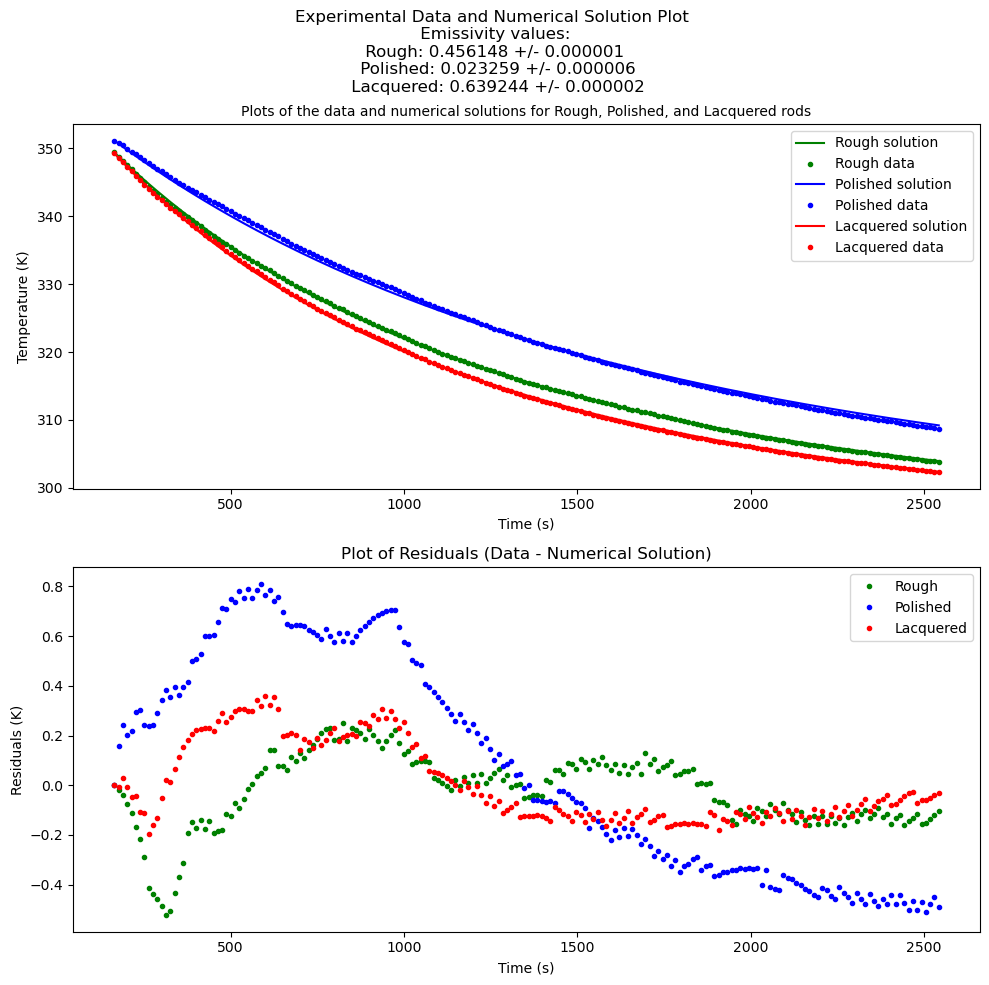

In [14]:
def fit(data, r):
    from scipy.optimize import curve_fit
    from scipy.integrate import solve_ivp

    D = r*2
    h = 0.304  # Length (m)
    A = np.pi * r**2 + np.pi * 2 * r * h  # Area (m^2)
    V = np.pi * r**2 * h  # Volume (m^3)
    rho = 2710  # Density (kg/m^3)
    m = rho * V  # Mass (kg)
    C = 887  # Specific heat capacity
    Tr = 21 + 273.15  # Room temperature (K)
    sig = 5.67 * 10**-8  # SB constant

    # Differential equation

    def cool(t, T, e):

        dQdt_rad = A * e * sig * (Tr**4 - T**4)

        dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)

        return np.array([(dQdt_rad + dQdt_con) / (m * C)])
        #return dQdt_rad

    def solve_cool1(t, e):

        # Initial conditions
        T01 = T1_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T01, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol
    
    def solve_cool2(t, e):

        # Initial conditions
        T02 = T2_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T02, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol
    
    def solve_cool3(t, e):

        # Initial conditions
        T03 = T3_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T03, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol

    t_data = data[13:,0]
    T1_data = data[13:,1] + 273.15
    T2_data = data[13:,2] + 273.15
    T3_data  = data[13:,3] + 273.15
    err = data[13:,4]
    
    # Uncertainty in the y-values
    yerr = err

    # Curve fitting
    # Inital temperature
    T1_r = [np.max(T1_data)]
    T2_r = [np.max(T2_data)]
    T3_r = [np.max(T3_data)]
    
    
    params1, pcov1 = curve_fit(solve_cool1, t_data, T1_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))
    params2, pcov2 = curve_fit(solve_cool2, t_data, T2_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))
    params3, pcov3 = curve_fit(solve_cool3, t_data, T3_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))

    e1 = params1[0]
    e2 = params2[0]
    e3 = params3[0]
    de1 = pcov1[0,0]
    de2 = pcov2[0,0]
    de3 = pcov3[0,0]

    T1_sol_r = solve_cool1(t_data, e1)
    T2_sol_r = solve_cool2(t_data, e2)
    T3_sol_r = solve_cool3(t_data, e3)
    
    Res1 = T1_data - T1_sol_r
    Res2 = T2_data - T2_sol_r
    Res3 = T3_data - T3_sol_r
    return (e1, de1, T1_sol_r, Res1),(e2,de2, T2_sol_r, Res2), (e3,de3, T3_sol_r, Res3)


data1 = np.genfromtxt('temp20230308-154114.csv', delimiter=',')

t = data1[13:,0]
T1_data = data1[13:,1] + 273.15
T2_data = data1[13:,2] + 273.15
T3_data  = data1[13:,3] + 273.15
err = data1[13:,4]

soln = fit(data1, 0.012)
e1,de1,t1,r1 = soln[0]
e2,de2,t2,r2 = soln[1]
e3,de3,t3,r3 = soln[2]
fig = plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.title('Plots of the data and numerical solutions for Rough, Polished, and Lacquered rods', fontsize = 10)
plt.suptitle(f'Experimental Data and Numerical Solution Plot \n Emissivity values: \n Rough: {e1:5f} +/- {de1:5f} \n Polished: {e2:5f} +/- {de2:5f}\n Lacquered: {e3:5f} +/- {de3:5f}', fontsize = 12)
plt.plot(t,t1, 'g-',label = 'Rough solution')
plt.plot(t,T1_data, 'g.',label = 'Rough data')
plt.plot(t,t2, 'b-', label = 'Polished solution')
plt.plot(t,T2_data, 'b.', label = 'Polished data')
plt.plot(t,t3,'r-',label = 'Lacquered solution')
plt.plot(t,T3_data, 'r.', label = 'Lacquered data')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.subplot(2,1,2)
plt.title('Plot of Residuals (Data - Numerical Solution)', fontsize = 12)
plt.plot(t,r1,'g.',label = 'Rough')
plt.plot(t,r2,'b.',label = 'Polished')
plt.plot(t,r3,'r.',label = 'Lacquered')
plt.xlabel('Time (s)')
plt.ylabel('Residuals (K)')
plt.legend()
plt.tight_layout()
e1,e2,e3

/tmp/ipykernel_56/232076819.py:21: RuntimeWarning: invalid value encountered in power
  dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)


(0.46627609498468486, 0.044310946178130466, 0.663912226790243)

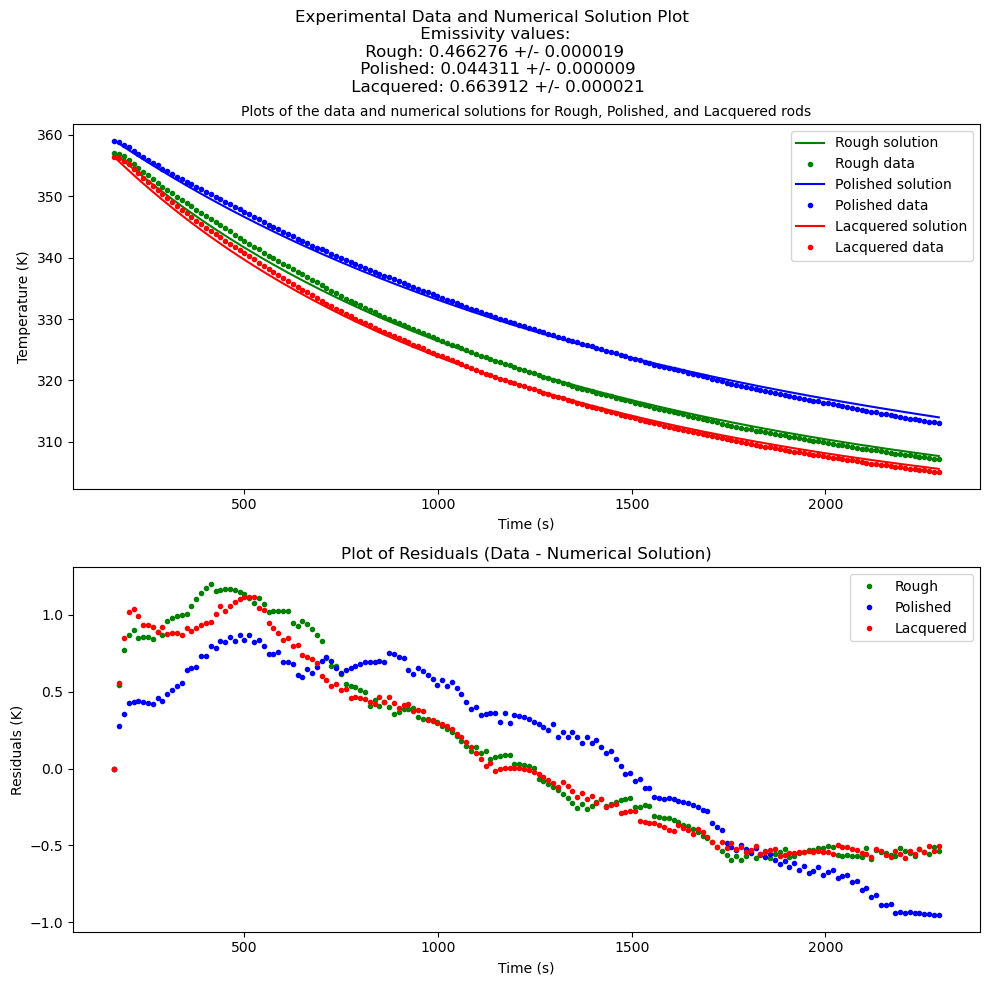

In [15]:
def fit(data, r):
    from scipy.optimize import curve_fit
    from scipy.integrate import solve_ivp

    D = r*2
    h = 0.304  # Length (m)
    A = np.pi * r**2 + np.pi * 2 * r * h  # Area (m^2)
    V = np.pi * r**2 * h  # Volume (m^3)
    rho = 2710  # Density (kg/m^3)
    m = rho * V  # Mass (kg)
    C = 887  # Specific heat capacity
    Tr = 21 + 273.15  # Room temperature (K)
    sig = 5.67 * 10**-8  # SB constant

    # Differential equation

    def cool(t, T, e):

        dQdt_rad = A * e * sig * (Tr**4 - T**4)

        dQdt_con = -1.32 * ((T - Tr) / (r * 2))**0.25 * A * (T - Tr)

        return np.array([(dQdt_rad + dQdt_con) / (m * C)])
        #return dQdt_rad

    def solve_cool1(t, e):

        # Initial conditions
        T01 = T1_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T01, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol
    
    def solve_cool2(t, e):

        # Initial conditions
        T02 = T2_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T02, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol
    
    def solve_cool3(t, e):

        # Initial conditions
        T03 = T3_r

        # Time interval to integrate over
        t0 = np.min(t) # initial time 
        tf = np.max(t) # final time
        t_pt = [t0, tf]
        t_arr = t

        # Define other inputs to function other that x and y values

        args = [e]

        sol = solve_ivp(fun=cool, t_span=t_pt, y0=T03, t_eval=t_arr, args=args)

        t_sol = sol['t']
        T_sol = sol['y'][0]

        return T_sol

    t_data = data[13:,0]
    T1_data = data[13:,1] + 273.15
    T2_data = data[13:,2] + 273.15
    T3_data  = data[13:,3] + 273.15
    err = data[13:,4]
    
    # Uncertainty in the y-values
    yerr = err

    # Curve fitting
    # Inital temperature
    T1_r = [np.max(T1_data)]
    T2_r = [np.max(T2_data)]
    T3_r = [np.max(T3_data)]
    
    
    params1, pcov1 = curve_fit(solve_cool1, t_data, T1_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))
    params2, pcov2 = curve_fit(solve_cool2, t_data, T2_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))
    params3, pcov3 = curve_fit(solve_cool3, t_data, T3_data, p0=[0.5], sigma=yerr, bounds=(0, np.inf))

    e1 = params1[0]
    e2 = params2[0]
    e3 = params3[0]
    de1 = pcov1[0,0]
    de2 = pcov2[0,0]
    de3 = pcov3[0,0]

    T1_sol_r = solve_cool1(t_data, e1)
    T2_sol_r = solve_cool2(t_data, e2)
    T3_sol_r = solve_cool3(t_data, e3)
    
    Res1 = T1_data - T1_sol_r
    Res2 = T2_data - T2_sol_r
    Res3 = T3_data - T3_sol_r
    return (e1, de1, T1_sol_r, Res1),(e2,de2, T2_sol_r, Res2), (e3,de3, T3_sol_r, Res3)


data1 = np.genfromtxt('temp20230308-144704.csv', delimiter=',')

t = data1[13:,0]
T1_data = data1[13:,1] + 273.15
T2_data = data1[13:,2] + 273.15
T3_data  = data1[13:,3] + 273.15
err = data1[13:,4]

soln = fit(data1, 0.0127)
e1,de1,t1,r1 = soln[0]
e2,de2,t2,r2 = soln[1]
e3,de3,t3,r3 = soln[2]
fig = plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.title('Plots of the data and numerical solutions for Rough, Polished, and Lacquered rods', fontsize = 10)
plt.suptitle(f'Experimental Data and Numerical Solution Plot \n Emissivity values: \n Rough: {e1:5f} +/- {de1:5f} \n Polished: {e2:5f} +/- {de2:5f}\n Lacquered: {e3:5f} +/- {de3:5f}', fontsize = 12)
plt.plot(t,t1, 'g-',label = 'Rough solution')
plt.plot(t,T1_data, 'g.',label = 'Rough data')
plt.plot(t,t2, 'b-', label = 'Polished solution')
plt.plot(t,T2_data, 'b.', label = 'Polished data')
plt.plot(t,t3,'r-',label = 'Lacquered solution')
plt.plot(t,T3_data, 'r.', label = 'Lacquered data')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.subplot(2,1,2)
plt.title('Plot of Residuals (Data - Numerical Solution)', fontsize = 12)
plt.plot(t,r1,'g.',label = 'Rough')
plt.plot(t,r2,'b.',label = 'Polished')
plt.plot(t,r3,'r.',label = 'Lacquered')
plt.xlabel('Time (s)')
plt.ylabel('Residuals (K)')
plt.legend()
plt.tight_layout()
e1,e2,e3

In [16]:
import numpy as np
def t_score (val1, val2,uval1, uval2):
    return np.abs(val1-val2)/np.sqrt((uval1**2) + (uval2**2))
print(t_score(0.456148,0.466276,0.000001,0.000002))
print(t_score(0.023259, 0.044311, 0.000006, 0.000009))
print(t_score(0.639244, 0.663912, 0.000002, 0.000002))


4529.379295223586
1946.258088488921
8721.455039154847


## Notes on analysis and data : 

The analysis shows an exponential decaying trend as expected. Emissivity is the measure of how well thermal energy is emitted. 
__Uncertainties for emissivities were acquired from the pcov parameter returned when we ran the solve_ivp function to fit for the emissivity using our data.__
The emissivities for our first data set are as follows : 

* Rough : 0.456148 +/- 0.000001
* Polished : 0.023259 +/- 0.000006
* Lacquered : 0.639244 +/- 0.000002

The emissivities for our second data set are as follows :

* Rough : 0.466276 +/- 0.000002
* Polished : 0.044311 +/- 0.000009
* Lacquered : 0.663912 +/- 0.000002
-----------------------------------------------------------------------------------------------

* We used the same rods for both data collections and would expect both of them to have similar if not the same values. This is indeed the case when looking at the rough and lacquered rods. Additionally, the polished rod has the smallest emissivity which entails that is emits the least amount of thermal energy and the lacquered rod has the highest emissivity which suggests that it emits the most amount of thermal energy.

* The residuals for the first data set don't show any specific trend however just at a rough glance it looks like the second data set describes a trend where initially, the temperature readings are overestimated and in the latter regions they are underestimated. This may be due to various reasons, primarily because of the possibility that some water must have stuck on to the surface of the thermal sensor due to surface tension which would then result in a slight addition of thermal conduction.

* In order to quantitatively ascertain the difference between the two values, a quick t-score calulation was done for each of the values. It is evident from t-scores of 4.5e+03, 1.9e+03 and 8.7e+03 that all the values are distinct however, this can be reasoned by taking into environmental factors which would lead to a slight deviation in the data being collected. These factors would include a foreign body moving near the rods during cooling, the aforementioned possibility of water or even breathing in close proximity. Additionally, very slight variations in room temperature controlled by the thermostat or impurities in the water could also affect the data.

* Due to the uncertainty in the temperature measurments being very small, there are hardly any visible error bars. This small uncertainty, one could argue is also the reason for the very high t-score, in addition to which the multiple factors unaccounted for would dramatically underestimate the uncertainties.

# Conclusion

* Our experiment was conducted to identify which out of a rough, polished and lacquered rod would cool the fastest based on convective and radiative modes of heat transfer as described by the following equation and consequently, their emissivities : 

$ \frac{dQ}{dt} = -T_{o}A(σeT_{o}^{4} + h) - hAT$

where $ h = 1.32 (\frac{T-T_{o}}{D})^{1/4}$

* Our initial hypothesis suggested that based on the assumption of maximum surface area, the rough rod would cool the fastest. This is contention with what we actually observe from the data; the lacquered rod cools the fastest. This is possibly because the lacquered finish provides a more even surface around the rod and maybe truly the maximum surface area as compared to the roughly distributed rough substance on the rough rod.

* We initially started with an inconvenient experimental setup which utilized glass thermometers which we had to manually read at set time intervals which proved to be more challenging. Instead in the following weeks, we resorted to callibrating and using DS18B20 thermal sensors which were connected to an arduino which was coded to collect data simultaneously for all three rods. We maintained the starting temperature (at approximately 108 degree Celsius) and the radius of the three rods. We did not keep the end point consistent as we wanted to identify how different our results would be if the rods were cooled for an extra 500 seconds. It is evident from the results that i was not overly significant.

* On average, the rough, polished and lacquered rods have emissivities 0.461212 +/- 0.000001 , 0.033785 +/- 0.000007 and 0.651578 +/- 0.000002. This was just quickly calculated by averaging the two values calculated from the two data sets.

* For further explorations of this experiment, one could collect data for a longer period of time and use rods of different diameters but same finishes to ascertain whether the lacquered rod regardless of overall observable width and surface area is always the first to cool.